In [21]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import numpy as np
from numpy.fft import fft2, fftshift, ifftshift
import matplotlib.pyplot as plt

# Function to apply phase transformation and compute interference pattern using FFT with padding
def convert_to_interference_phase(image, phase_shift):

    phase_image = image * np.exp(1j * phase_shift)
    padded_image = np.pad(phase_image, pad_width=((14, 14), (14, 14)), mode='constant')
    shifted_image = ifftshift(padded_image)

    fft_image = ifftshift(fft2(shifted_image))
    phase_transformed = np.stack([fft_image.real, fft_image.imag], axis=-1).astype('float32')
    return phase_transformed

# Load and preprocess the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

# Normalize pixel values to [0, 1]
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

phase_shift = 2 * np.pi / 3

# Apply the phase transformation to all images
train_images_phase = np.array([convert_to_interference_phase(image, phase_shift) for image in train_images])
test_images_phase = np.array([convert_to_interference_phase(image, phase_shift) for image in test_images])

In [22]:
train_images.shape

(60000, 28, 28)

In [23]:
test_images.shape

(10000, 28, 28)

In [24]:
idx = 456

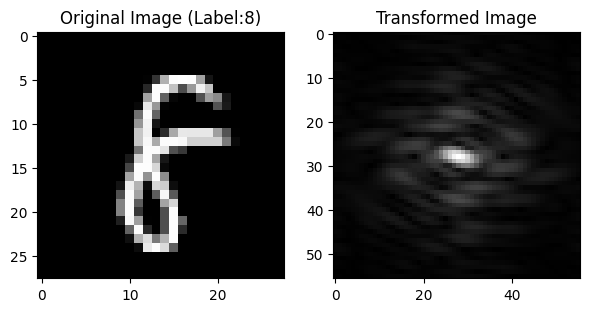

In [27]:
fig, axs = plt.subplots(1,2, figsize = (7,5))
org_img = train_images[idx,:,:].reshape((28,28))
transformed_img = np.sqrt((train_images_phase[idx,:,:,0])**2 + (train_images_phase[idx,:,:,1])**2).reshape((56,56))
label = train_labels[idx]

axs[0].imshow(org_img, cmap = 'gray')
axs[0].set_title(f"Original Image (Label:{label})")

axs[1].imshow(img, cmap = 'gray')
axs[1].set_title(f"Transformed Image")
plt.show()